## 5. Problem 2: Larger unlabeled subset (Written Report)
### 0. Loading the data

1. Load the data in X.npy. Take log-transform $log_2(x+1)$ for the data. How many cells and genes are in the transformed data set?
2. What is the value of the largest entry in the first column of the transformed data matrix? 

In [1]:
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [2]:
# load the data
path = "../01_data/data/p2_unsupervised/"
X = np.load(path + "X.npy")
X = np.log2(X+1)
print("1: Number of Cells (number of rows): {}".format(X.shape[0]))
print("1: Number of Genes (number of columns): {}".format(X.shape[1]))

print("2: largest entry in the first column of processed data: {:.7}".format(X[:,0].max()))

1: Number of Cells (number of rows): 2169
1: Number of Genes (number of columns): 45768
2: largest entry in the first column of processed data: 5.972169


## Part 1: Visualization
### 1. Principal Components and Explained Variance

Using PCA for the reduction of dimensionality.

First question: How many PC's do I need to define all information of the data? Use a plot for visualization's sake. 

Answer: We need a lot of PC's to get a satisfying explained variance. Therefore we limit the used PC's to 50 to use the most important PC's. 

In [3]:
# fit the model with X
X_PCA_temp = PCA(n_components=1000).fit(X)

Percentage of the variance explained (1st PC): 0.155
Percentage of the variance explained (2nd PC): 0.0443
Percentage of the variance explained (3rd PC): 0.0176
Percentage of the cumulated variance explained (1...50): 0.337
Percentage of the cumulated variance explained (1...100): 0.373
Percentage of the cumulated variance explained (1...250): 0.468
Percentage of the cumulated variance explained (1...1000): 0.774


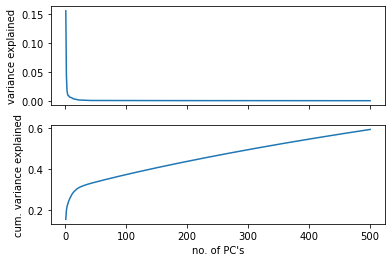

In [4]:
print("Percentage of the variance explained (1st PC): {:.3}".format(X_PCA_temp.explained_variance_ratio_[0]))
print("Percentage of the variance explained (2nd PC): {:.3}".format(X_PCA_temp.explained_variance_ratio_[1]))
print("Percentage of the variance explained (3rd PC): {:.3}".format(X_PCA_temp.explained_variance_ratio_[2]))
print("Percentage of the cumulated variance explained (1...50): {:.3}".format(np.sum(X_PCA_temp.explained_variance_ratio_[0:49])))
print("Percentage of the cumulated variance explained (1...100): {:.3}".format(np.sum(X_PCA_temp.explained_variance_ratio_[0:99])))
print("Percentage of the cumulated variance explained (1...250): {:.3}".format(np.sum(X_PCA_temp.explained_variance_ratio_[0:249])))
print("Percentage of the cumulated variance explained (1...1000): {:.3}".format(np.sum(X_PCA_temp.explained_variance_ratio_[0:999])))
# plot the variance ratio corresponding to the number of PC's 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(np.arange(1,501), X_PCA_temp.explained_variance_ratio_[0:500])
ax1.set_ylabel("variance explained")
ax2.plot(np.arange(1,501), np.cumsum(X_PCA_temp.explained_variance_ratio_[0:500]))
ax2.set_ylabel("cum. variance explained")
ax2.set_xlabel("no. of PC's")
plt.show
plt.savefig("../03_report/problem_02/PCA_analysis.png", dpi=300)

<function matplotlib.pyplot.show(close=None, block=None)>

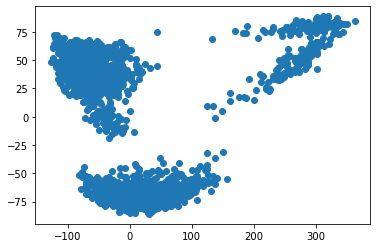

In [5]:
# fit the model with X and apply the dimensionality reduction, plot the data in scatter plot
X_PCA = PCA(n_components=50).fit_transform(X)
plt.scatter(X_PCA[:,0], X_PCA[:,1])
plt.show

### 2. Clustering the data with K-Means

From our problem describtions we know, that there 3 sets of different cell types in our data set. Hence we are looking for three clusters.

But to get the full picture we will plot the "elbow" graph: The quality of describtion over the number of clusters. This supports the given information that there might be three clusters.

We cluster the data using K-Means and plot the data points in the next step. Firstly, the clusters are shown over the first two PC's of the PCA. Lastly, the clusters are shown via T-SNE. 

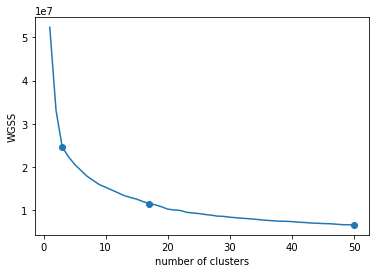

In [34]:
# plot the elbow graph and calculte multiple cluster-models
max_no_cluster = 50
X_KMeans = []
WGSS = np.empty((max_no_cluster,2))
for i in np.arange(1, max_no_cluster+1, 1):
    print("{}%".format(float(i*100)/max_no_cluster+1), end='\r')
    WGSS[i-1,0] = i
    WGSS[i-1,1] = KMeans(n_clusters=i, n_init=10).fit(X_PCA[:,:49]).inertia_
    X_KMeans.append(KMeans(n_clusters=i, n_init=10).fit_predict(X_PCA[:,:49]))
plt.plot(WGSS[:,0], WGSS[:,1])
plt.scatter(np.array([WGSS[2,0],WGSS[16,0],WGSS[49,0]]), np.array([WGSS[2,1],WGSS[16,1],WGSS[49,1]]))
plt.ylabel("WGSS")
plt.xlabel("number of clusters")
plt.show
plt.savefig("../03_report/problem_02/elbow_plot.png", dpi=300)

<function matplotlib.pyplot.show(close=None, block=None)>

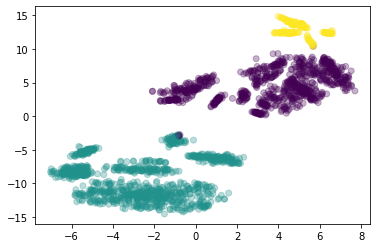

In [10]:
# T_SNE with perplexity 500
X_TSNE_500 = TSNE(n_components=2, verbose=0, perplexity=500).fit_transform(X_PCA)
plt.scatter(X_TSNE_500[:,0], X_TSNE_500[:,1], c=X_KMeans[2], alpha=0.3)
plt.show

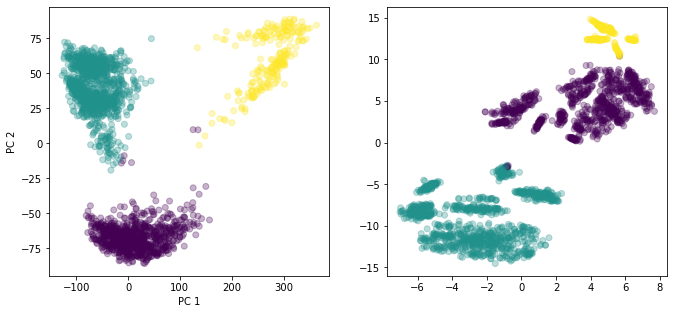

In [24]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.scatter(X_PCA[:,0], X_PCA[:,1], c=X_KMeans[2], alpha=0.3)
ax1.set_xlabel("PC 1")
ax1.set_ylabel("PC 2")

ax2.scatter(X_TSNE_500[:,0], X_TSNE_500[:,1], c=X_KMeans[2], alpha=0.3)

fig.tight_layout(pad=3.0)

plt.show
plt.savefig("../03_report/problem_02/clusters.png", dpi=300)

### 4. Plotting the data with sub-clusters

Each cell type has according to our scientist several sub-clusters. This should be investigated by increasing the number of clusters.

First Approach: Plotting the data points over the first two PC's.
Second Approach: Plotting the data points with different T-SNE settings.

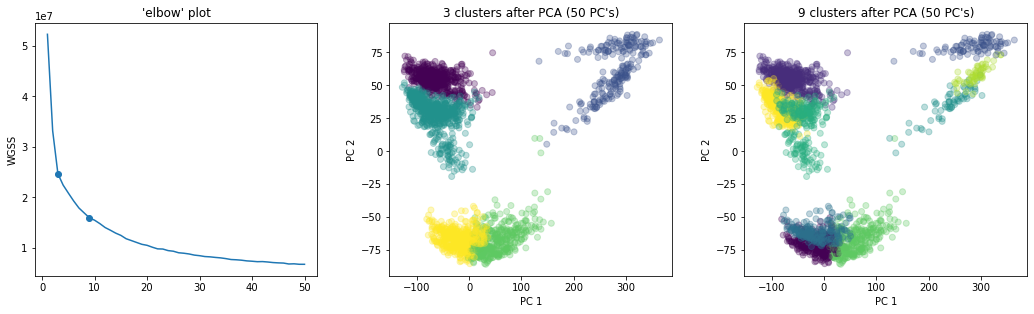

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

ax1.set_title("'elbow' plot")
ax1.plot(WGSS[:,0], WGSS[:,1])
ax1.scatter(np.array([WGSS[2,0],WGSS[8,0]]), np.array([WGSS[2,1],WGSS[8,1]]))
ax1.set_ylabel("WGSS")

ax2.set_title("3 clusters after PCA (50 PC's)")
ax2.scatter(X_PCA[:,0], X_PCA[:,1], c=X_KMeans[4], alpha=0.3)
ax2.set_xlabel("PC 1")
ax2.set_ylabel("PC 2")

ax3.set_title("9 clusters after PCA (50 PC's)")
ax3.scatter(X_PCA[:,0], X_PCA[:,1], c=X_KMeans[8], alpha=0.3)
ax3.set_xlabel("PC 1")
ax3.set_ylabel("PC 2")

fig.tight_layout(pad=3.0)

plt.show
plt.savefig("../03_report/problem_02/number_clusters_PCA.png", dpi=300)

In [15]:
X_TSNE_25 = TSNE(n_components=2, verbose=0, perplexity=25).fit_transform(X_PCA)

In [16]:
X_TSNE_100 = TSNE(n_components=2, verbose=0, perplexity=100).fit_transform(X_PCA)

In [ ]:
X_MDS = MDS(n_components=2).fit_transform(X_PCA)

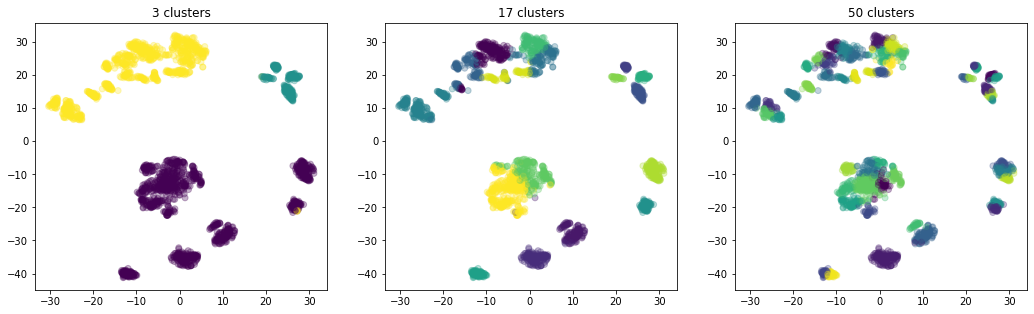

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

ax1.scatter(X_TSNE_100[:,0], X_TSNE_100[:,1], c=X_KMeans[2], alpha=0.3)
ax1.set_title("3 clusters")
ax2.scatter(X_TSNE_100[:,0], X_TSNE_100[:,1], c=X_KMeans[16], alpha=0.3)
ax2.set_title("17 clusters")
ax3.scatter(X_TSNE_100[:,0], X_TSNE_100[:,1], c=X_KMeans[49], alpha=0.3)
ax3.set_title("50 clusters")

fig.tight_layout(pad=3.0)

plt.show
plt.savefig("../03_report/problem_02/number_clusters_TSNE.png", dpi=300)

## Part 2: Unsupervised Feature Selection

Now we attempt to find informative genes which can help us differentiate between cells, using only unlabeled data. A genomics researcher would use specialized, domain-specific tools to select these genes. We will instead take a general approach using logistic regression in conjunction with clustering. Briefly speaking, we will use the p2_unsupervised dataset to cluster the data. Treating those cluster labels as ground truth, we will fit a logistic regression model and use its coefficients to select features. Finally, to evaluate the quality of these features, we will fit another logistic regression model on the training set in p2_evaluation, and run it on the test set in the same folder. 

1. Choosing the number of clusters: Using your clustering method(s) of choice, find a suitable clustering for the cells. Briefly explain how you chose the number of clusters by appropriate visualizations and/or numerical findings.

2. We will now treat your cluster assignments as labels for supervised learning. Fit a logistic regression model to the original data (not principal components), with your clustering as the target labels. Since the data is high-dimensional, make sure to regularize your model using your choice of $l_1$, $l_2$, or elastic net, and separate the data into training and validation or use cross-validation to select your model. Report your choice of regularization parameter and validation performance. 